In [1]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./london_weather.csv')

In [3]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [5]:
def convert_int_to_datetime(date_int):
    date_str = str(date_int)
    return datetime.strptime(date_str, '%Y%m%d')

df['date'] = df['date'].apply(convert_int_to_datetime)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [6]:
mean_df = df[['date', 'mean_temp']]
mean_df = mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [7]:
mean_df

,ds,y
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
15336,2020-12-27,7.5
15337,2020-12-28,1.1
15338,2020-12-29,2.6
15339,2020-12-30,2.7


In [8]:
model = Prophet()
model.fit(mean_df)
future = model.make_future_dataframe(periods=1826)

20:00:36 - cmdstanpy - INFO - Chain [1] start processing
20:00:39 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future

,ds
0,1979-01-01
1,1979-01-02
2,1979-01-03
3,1979-01-04
4,1979-01-05
...,...
17126,2025-12-27
17127,2025-12-28
17128,2025-12-29
17129,2025-12-30


In [10]:
forecast = model.predict(future)

In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,10.073556,0.596425,8.014216,10.073556,10.073556,-5.967687,-5.967687,-5.967687,-0.009022,-0.009022,-0.009022,-5.958666,-5.958666,-5.958666,0.0,0.0,0.0,4.105869
1,1979-01-02,10.074010,0.374741,7.780237,10.074010,10.074010,-6.015453,-6.015453,-6.015453,-0.020539,-0.020539,-0.020539,-5.994914,-5.994914,-5.994914,0.0,0.0,0.0,4.058557
2,1979-01-03,10.074464,0.366242,7.560702,10.074464,10.074464,-5.986647,-5.986647,-5.986647,0.045498,0.045498,0.045498,-6.032145,-6.032145,-6.032145,0.0,0.0,0.0,4.087817
3,1979-01-04,10.074918,0.438082,7.440498,10.074918,10.074918,-6.045813,-6.045813,-6.045813,0.024069,0.024069,0.024069,-6.069882,-6.069882,-6.069882,0.0,0.0,0.0,4.029105
4,1979-01-05,10.075372,0.189679,7.707028,10.075372,10.075372,-6.115762,-6.115762,-6.115762,-0.008151,-0.008151,-0.008151,-6.107611,-6.107611,-6.107611,0.0,0.0,0.0,3.959610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,13.249573,3.563275,10.893562,12.838525,13.682671,-5.840213,-5.840213,-5.840213,-0.028972,-0.028972,-0.028972,-5.811241,-5.811241,-5.811241,0.0,0.0,0.0,7.409360
17127,2025-12-28,13.249899,3.760519,11.424558,12.838899,13.683412,-5.840961,-5.840961,-5.840961,-0.002883,-0.002883,-0.002883,-5.838078,-5.838078,-5.838078,0.0,0.0,0.0,7.408938
17128,2025-12-29,13.250225,3.714254,11.127329,12.839273,13.684154,-5.876358,-5.876358,-5.876358,-0.009022,-0.009022,-0.009022,-5.867337,-5.867337,-5.867337,0.0,0.0,0.0,7.373867
17129,2025-12-30,13.250551,3.851765,11.151467,12.839415,13.684895,-5.919392,-5.919392,-5.919392,-0.020539,-0.020539,-0.020539,-5.898853,-5.898853,-5.898853,0.0,0.0,0.0,7.331159


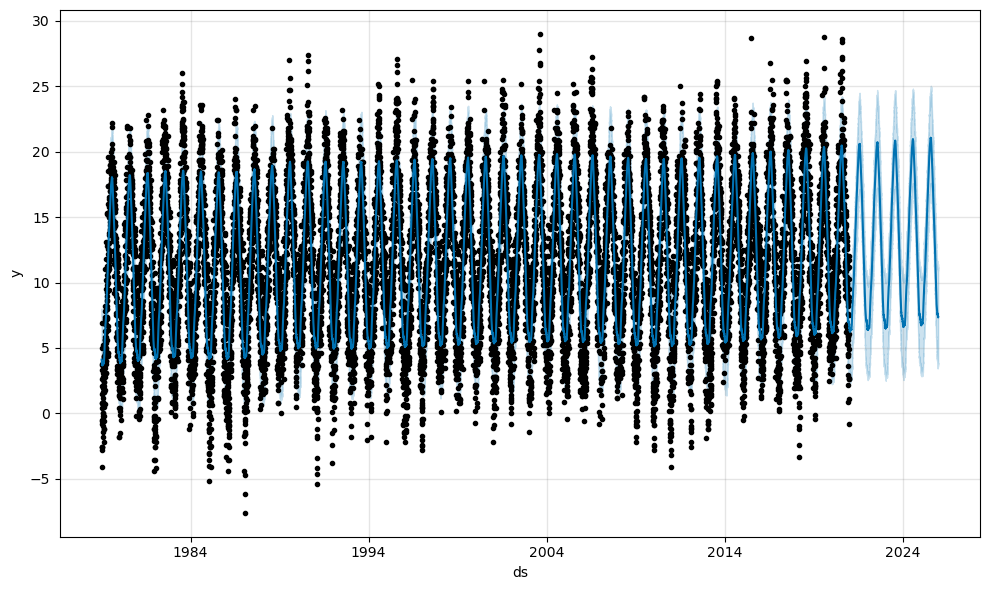

In [12]:
# This shows a narrow prediction line, indicating past trends can be used to make a prediction about average daily temps
fig = model.plot(forecast)

In [13]:
max_df = df[['date', 'max_temp']]
max_df = max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

min_df = df[['date', 'min_temp']]
min_df = min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [14]:
model_max = Prophet()
model_max.fit(max_df)
future_max = model_max.make_future_dataframe(periods=1825)

model_min = Prophet()
model_min.fit(min_df)
future_min = model_min.make_future_dataframe(periods=1825)

20:00:50 - cmdstanpy - INFO - Chain [1] start processing
20:00:53 - cmdstanpy - INFO - Chain [1] done processing
20:00:56 - cmdstanpy - INFO - Chain [1] start processing
20:00:59 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
forecast_max = model_max.predict(future_max)

forecast_min = model_min.predict(future_min)

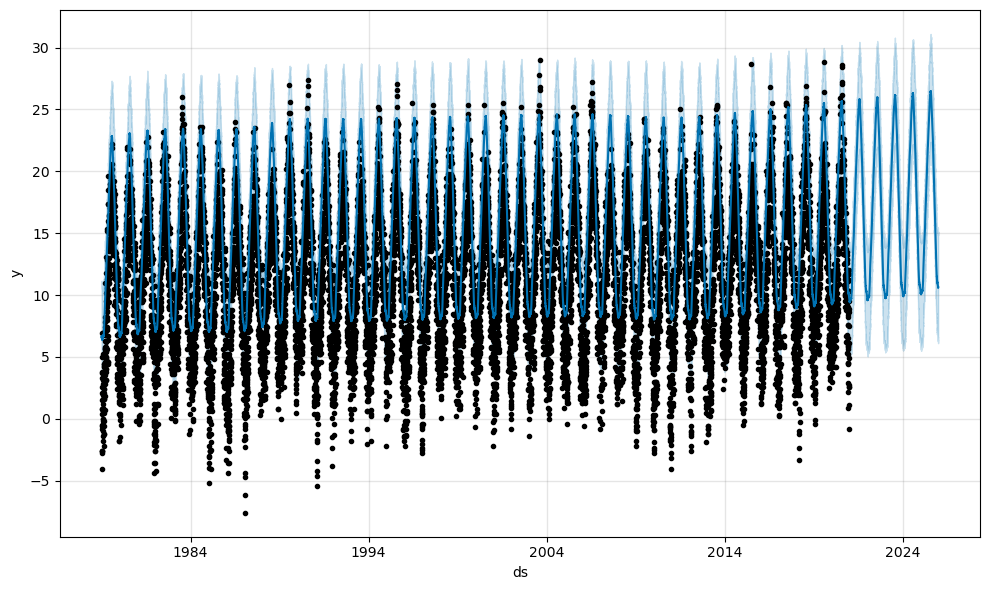

In [16]:
fig_max = model.plot(forecast_max)

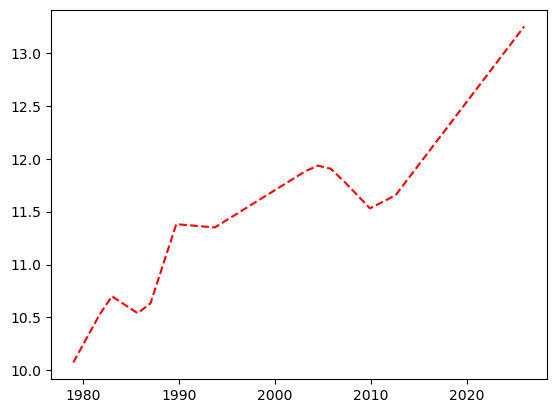

In [17]:
linear_reg_line = plt.plot(forecast['ds'], forecast['trend'], linestyle='--', color='red', label='Linear Regression Line')

In [18]:
forecast = forecast.set_index('ds')

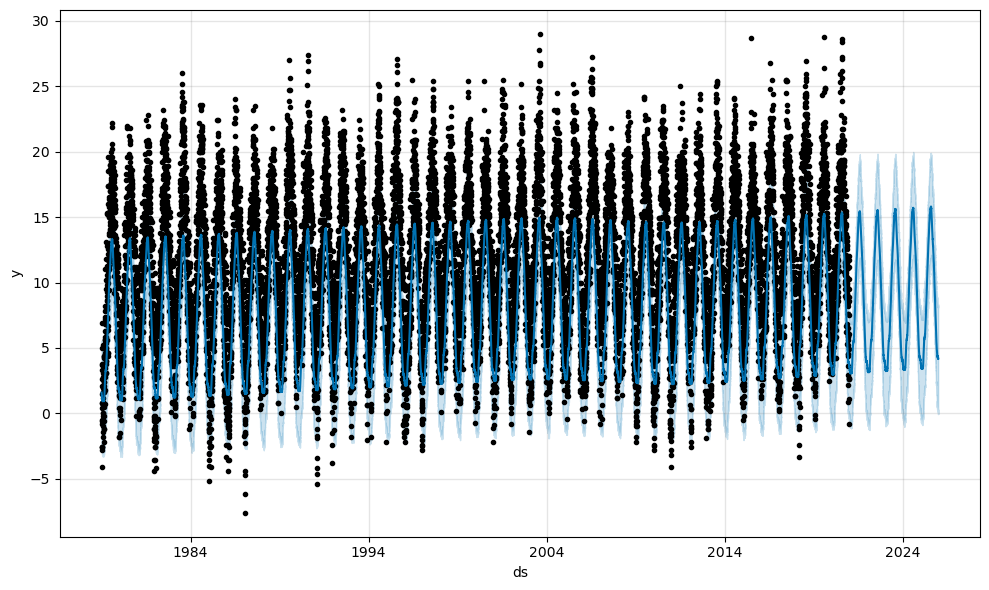

In [19]:
fig_min = model.plot(forecast_min)

<Axes: xlabel='ds'>

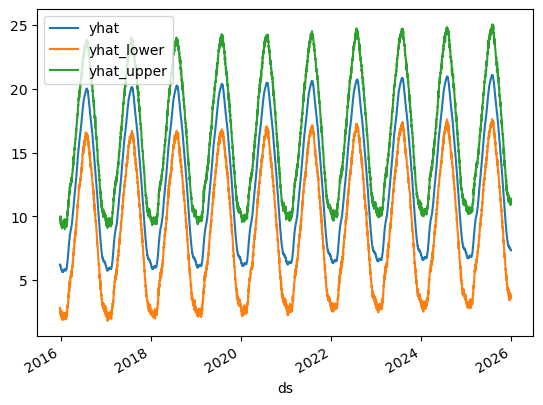

In [20]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-3650:,:].plot()